In [1]:
from plasma_classes import *
from plasma_utils import *
import numpy as np
from matplotlib import pyplot as plt

In [2]:
N_x = 1000; #количество ячеек
L = 10000; #длина системы
h = L / N_x; #длина ячейки
tau = 0.01

In [3]:
start_x = 0.5
start_velocity = 0
particle_mass = 1.5         #9.1093837e-31
particle_charge = 2         #1.60217e-19

In [4]:
nodes = Nodes(N_x)

In [5]:
import math

In [6]:
alpha = 1e-3

In [7]:
grid = np.linspace(0, L, N_x + 1)

In [8]:
nodes.E = alpha*grid

In [9]:
particles = Particles(1, 1, particle_charge, particle_mass)
particles.x[0] = start_x
particles.v[0] = 0
particles.normalise(h, tau)

In [10]:
nodes.E[50]

0.5

In [11]:
accel(particles, nodes, L, h, tau, zerostep=True)

In [12]:
particles.v[0]

-6.666666666666668e-09

In [13]:
n = 10000

In [14]:
from tqdm import tqdm

In [15]:
def calc_kinetic_energy(particles: Particles, h: float, tau: float):
    if particles.normalised:
        particles.denormalise(h, tau)
    res = np.sum(particles.v**2)*particles.m*particles.concentration/2
    particles.normalise(h, tau)
    return res

In [16]:
def calc_electric_energy(particles: Particles, nodes: Nodes, h: float):
    res = 0
    rho = particles.q*particles.concentration
    for i in range(particles.n_macro):
        x = particles.x[i]
        phi = weight_field_value(x, nodes.phi)
        res += rho*phi
    return res

In [17]:
kinetic_history = []
electric_history = []
summ_history = []

In [18]:
history = []
shift = 0
for i in tqdm(range(n)):
    try:
        move(particles, nodes, mode="periodic", consistency=True)
    except:
        print(i)
        break
    accel(particles, nodes, L, h, tau)
    history.append(particles.x[0]+shift)

history = np.array(history)*h

100%|██████████| 10000/10000 [00:00<00:00, 118041.34it/s]


In [16]:
history.shape

(10000,)

In [17]:
k = (alpha*particle_charge/particle_mass)

In [18]:
t = np.arange(n)*tau

In [19]:
theory = start_x*np.power(np.e, t*math.sqrt(k))/2+start_x*np.power(np.e, -t*math.sqrt(k))/2

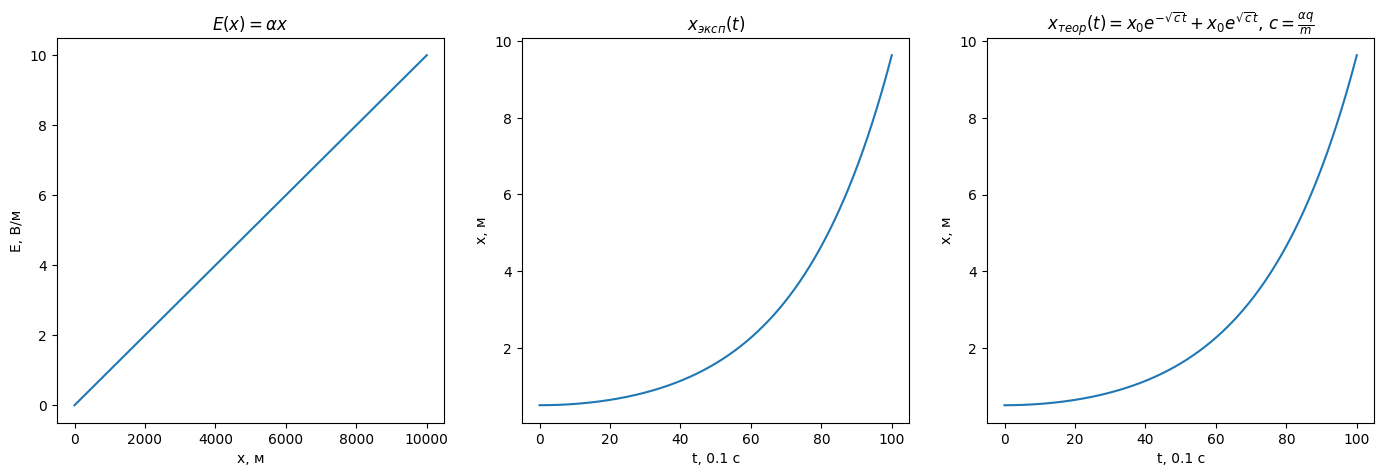

In [20]:
fig, ax = plt.subplots(1, 3)

ax[0].plot(grid, nodes.E)
ax[0].set_title(r'$E(x) = \alpha x$')
ax[0].set_xlabel('x, м')
ax[0].set_ylabel('E, В/м')

ax[1].plot(t, history)
ax[1].set_title(r'$x_{эксп}(t)$')
ax[1].set_xlabel('t, 0.1 c')
ax[1].set_ylabel('x, м')

ax[2].plot(t, theory)
ax[2].set_title(r'$x_{теор}(t)=x_0e^{-\sqrt{c}t}+x_0e^{\sqrt{c}t}$, $c=\frac{\alpha q}{m}$')
ax[2].set_xlabel('t, 0.1 c')
ax[2].set_ylabel('x, м')

fig.set_size_inches((17, 5))
%matplotlib inline

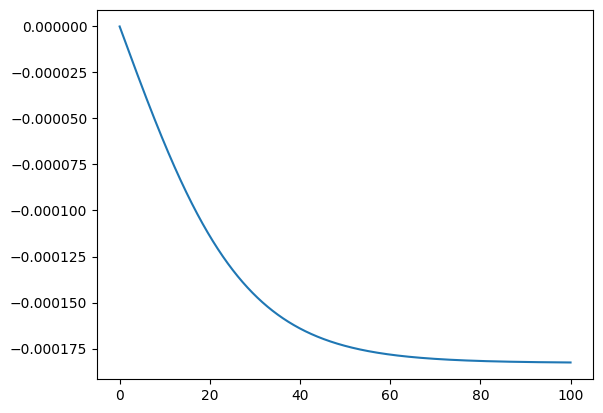

In [21]:
plt.plot(t, (history-theory)/history)